In [14]:
from os import listdir
images_dir = 'dataset/train_data'
file_names = listdir(images_dir)
sample_count = len(file_names)
print(sample_count)

800


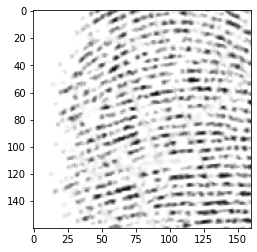

In [15]:
import cv2
import matplotlib.pyplot as plt
first_image = cv2.imread(images_dir + '/' + file_names[0], cv2.IMREAD_GRAYSCALE)
plt.imshow(first_image, cmap='gray')
height, width = first_image.shape

In [16]:
from os.path import splitext
import pandas as pd
import numpy as np
depth = 1
X = np.zeros((sample_count, width, height, depth))
y = np.zeros((sample_count, 1), dtype=int)

In [17]:
for index, file_name in enumerate(file_names):
    full_path = images_dir + '/' + file_name
    file_label_text, file_number_and_ext = file_name.split('_') 
    image = cv2.imread(full_path, cv2.IMREAD_GRAYSCALE)
    label = int(file_label_text)
    X[index] = np.reshape(image, (width, height, depth)) 
    y[index] = label

In [18]:
unique_classes = 10
y_one_hot = np.zeros((sample_count, unique_classes)) 
for index, label in enumerate(y):
    y_one_hot[index, label] = 1

In [19]:
from tensorflow.keras import layers, losses, metrics, optimizers
from tensorflow.keras.models import Sequential
classifier = Sequential([
    layers.Conv2D(32, kernel_size=3, activation='relu', input_shape=(height, width, depth)),
    layers.MaxPooling2D(pool_size=2),
    layers.Conv2D(64, kernel_size=3, activation='relu'),
    layers.MaxPooling2D(pool_size=2),
    layers.Conv2D(128, kernel_size=3, activation='relu'),
    layers.MaxPooling2D(pool_size=2),
    layers.Flatten(),
    layers.Dense(256),
    layers.Dense(10, activation='sigmoid')
])
classifier.compile(loss='binary_crossentropy',
optimizer=optimizers.RMSprop(), metrics=['accuracy'])
classifier.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 158, 158, 32)      320       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 79, 79, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 77, 77, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 38, 38, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 36, 36, 128)       73856     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 18, 18, 128)     

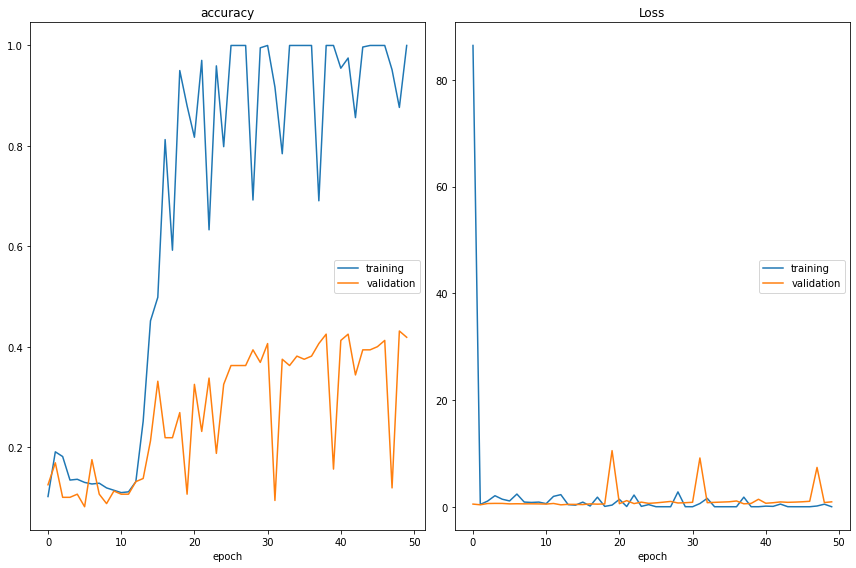

accuracy
	training         	 (min:    0.102, max:    1.000, cur:    1.000)
	validation       	 (min:    0.081, max:    0.431, cur:    0.419)
Loss
	training         	 (min:    0.000, max:   86.435, cur:    0.001)
	validation       	 (min:    0.357, max:   10.514, cur:    0.919)


In [20]:
from livelossplot import PlotLossesKeras
classifier.fit(X, y_one_hot, verbose=0, epochs=50, validation_split=0.2, callbacks=[PlotLossesKeras()])

In [9]:
import numpy as np
import cv2
from os import listdir

In [161]:
def load_data_from_folder(images_dir, height, width, depth):
    dir_names = listdir(images_dir)
    dir_count = len(dir_names)
    
    images_real = {}
    images_forgery = {}
    labels = set()
    
    for dir_name in dir_names:
        parts = dir_name.split('_')
        label_text = parts[0]
        is_forgery = len(parts) > 1
    
        if (label_text not in labels):
            labels.add(label_text)
            
        if label_text not in images_real:
            images_real[label_text] = []
            
        if label_text not in images_forgery:
            images_forgery[label_text] = []
            
        image_file_names = listdir(images_dir + '/' + dir_name)
        for image_file_name in image_file_names:
            image = cv2.imread(images_dir + '/' + dir_name + '/'+ image_file_name, cv2.IMREAD_GRAYSCALE)
            if is_forgery:
                images_forgery[label_text].append(image)
            else:
                images_real[label_text].append(image)
                
    X_base_list = []
    X_comparison_list = []
    y_list = []
    
    for label in labels:
        real_samples = images_real[label]
        forged_samples = images_forgery[label]
        for real_img in real_samples:
            real_resized = cv2.resize(real_img, (width, height))
            for another_real in real_samples:
                
                another_resized = cv2.resize(another_real, (width, height))
                X_base_list.append(real_resized.reshape((width, height, depth)))

                X_comparison_list.append(another_resized.reshape((width, height,depth)))
                y_list.append(1)
                
            for another_fake in forged_samples:
                fake_resized = cv2.resize(another_fake, (width, height))
                X_base_list.append(real_resized.reshape((width, height, depth)))

                X_comparison_list.append(fake_resized.reshape((width, height, depth)))
                y_list.append(0)
                
    X_base = np.array(X_base_list)
    X_comparison = np.array(X_comparison_list)
    y = np.array(y_list)

    return X_base, X_comparison, y

In [162]:
width = 100
height = 100
depth = 1
train_folder = 'sign_data/data/test'

In [163]:
X_base, X_comparison, y = load_data_from_folder(train_folder, height, width, depth)

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known inc

In [164]:
from tensorflow.keras import layers, losses, metrics, optimizers 
from tensorflow.keras.models import Model
x1 = layers.Input(shape=(width, height, depth))
x2 = layers.Input(shape=(width, height, depth))
# параллельная модель
inputs = layers.Input(shape=(width, height, depth)) 
feature = layers.Conv2D(32, 3, activation='relu')(inputs) 
feature = layers.MaxPooling2D(2)(feature)
feature = layers.Conv2D(64, 3, activation='relu')(feature) 
feature = layers.MaxPooling2D(2)(feature)
feature = layers.Conv2D(128, 3, activation='relu')(feature) 
feature = layers.MaxPooling2D(2)(feature)
feature_model = Model(inputs=inputs, outputs=feature)
x1_net = feature_model(x1)
x2_net = feature_model(x2)
net = layers.Subtract()([x1_net, x2_net])
net = layers.Conv2D(128, 3, activation='relu')(net) 
net = layers.MaxPooling2D(2)(net)
net = layers.Flatten()(net)
net = layers.Dense(512, activation='relu')(net)

Model: "model_21"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_22 (InputLayer)          [(None, 100, 100, 1  0           []                               
                                )]                                                                
                                                                                                  
 input_23 (InputLayer)          [(None, 100, 100, 1  0           []                               
                                )]                                                                
                                                                                                  
 model_19 (Functional)          (None, 10, 10, 128)  92672       ['input_22[0][0]',               
                                                                  'input_23[0][0]']        

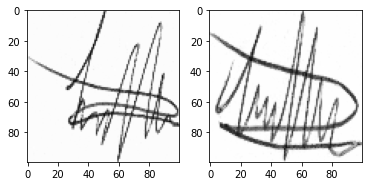

In [166]:
net = layers.Dense(1, activation='sigmoid')(net)
classifier = Model(inputs=[x1, x2], outputs=net)
classifier.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(), metrics=['accuracy'])
classifier.summary()

import matplotlib.pyplot as plt

index = 3
f, axes = plt.subplots(1,2)
axes[0].imshow(X_base[index, :, :, 0], cmap='gray')
axes[1].imshow(X_comparison[index, :, :, 0], cmap='gray')
print(f'Label: {y[index]}')

In [167]:
from tensorflow.keras import layers, losses, metrics, optimizers
from tensorflow.keras.models import Model

x1 = layers.Input(shape=(width, height, depth))
x2 = layers.Input(shape=(width, height, depth))

# параллельная модель
inputs = layers.Input(shape=(width, height, depth))
feature = layers.Conv2D(32, 3, activation='relu')(inputs)
feature = layers.MaxPooling2D(2)(feature)
feature = layers.Conv2D(64, 3, activation='relu')(feature)
feature = layers.MaxPooling2D(2)(feature)
feature = layers.Conv2D(128, 3, activation='relu')(feature)
feature = layers.MaxPooling2D(2)(feature)
feature_model = Model(inputs=inputs, outputs=feature)

x1_net = feature_model(x1)
x2_net = feature_model(x2)

net = layers.Subtract()([x1_net, x2_net])
net = layers.Conv2D(128, 3, activation='relu')(net)
net = layers.MaxPooling2D(2)(net)
net = layers.Flatten()(net)
net = layers.Dense(512, activation='relu')(net)
net = layers.Dense(1, activation='sigmoid')(net)

classifier = Model(inputs=[x1, x2], outputs=net)
classifier.compile(loss='binary_crossentropy',
optimizer=optimizers.RMSprop(), metrics=['accuracy'])
classifier.summary()

Model: "model_23"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_25 (InputLayer)          [(None, 100, 100, 1  0           []                               
                                )]                                                                
                                                                                                  
 input_26 (InputLayer)          [(None, 100, 100, 1  0           []                               
                                )]                                                                
                                                                                                  
 model_22 (Functional)          (None, 10, 10, 128)  92672       ['input_25[0][0]',               
                                                                  'input_26[0][0]']        

In [168]:
classifier.fit([X_base, X_comparison], y, epochs=10)


Epoch 1/10
188/188 [==============================] - 92s 485ms/step - loss: 0.6032 - accuracy: 0.9177
Epoch 2/10
188/188 [==============================] - 119s 635ms/step - loss: 0.0988 - accuracy: 0.9807
Epoch 3/10
188/188 [==============================] - 115s 613ms/step - loss: 0.0496 - accuracy: 0.9877
Epoch 4/10
188/188 [==============================] - 116s 617ms/step - loss: 0.0263 - accuracy: 0.9940
Epoch 5/10
188/188 [==============================] - 90s 480ms/step - loss: 0.0264 - accuracy: 0.9948
Epoch 6/10
188/188 [==============================] - 94s 499ms/step - loss: 0.0159 - accuracy: 0.9978
Epoch 7/10
188/188 [==============================] - 80s 423ms/step - loss: 0.0077 - accuracy: 0.9990
Epoch 8/10
188/188 [==============================] - 78s 416ms/step - loss: 0.0283 - accuracy: 0.9975
Epoch 9/10
188/188 [==============================] - 78s 416ms/step - loss: 3.4456e-06 - accuracy: 1.0000
Epoch 10/10
188/188 [==============================] - 79s 421ms/s